In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving final_price_champadanga_rainfall_data.csv to final_price_champadanga_rainfall_data.csv


In [5]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['final_price_champadanga_rainfall_data.csv'].decode('utf-8')))
print(df)

            Date  Rainfall  Modal Price (Rs./Quintal)  Max Price (Rs./Quintal)
0     2009-08-30     332.7                       1620                     1630
1     2010-11-02       6.3                        590                      600
2     2010-06-18     189.3                        400                      400
3     2012-10-29      64.2                       1180                     1200
4     2012-12-23      24.6                        920                      920
...          ...       ...                        ...                      ...
3313  2017-02-03       0.0                        360                      380
3314  2017-09-16     191.4                        540                      550
3315  2016-03-06      14.7                       1070                     1080
3316  2017-02-10       0.0                        360                      380
3317  2017-07-13     489.3                        590                      590

[3318 rows x 4 columns]


In [6]:
# Extract month and year from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])



df['Month'] = df['Date'].dt.strftime('%m').str.upper()
df['Year'] = df['Date'].dt.year

In [7]:
# Convert the 'Month' column to integer type
df['Month'] = df['Month'].astype(int)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# Aggregate data by date
daily_data = df.groupby('Date').agg({'Rainfall':'mean', 'Modal Price (Rs./Quintal)':'mean', 'Modal Price (Rs./Quintal)':'mean'}).reset_index()

In [10]:
# Normalize the data
scaler = MinMaxScaler()
daily_data[['Rainfall', 'Modal Price (Rs./Quintal)']] = scaler.fit_transform(daily_data[['Rainfall', 'Modal Price (Rs./Quintal)']])

In [11]:
# Function to create sequences
def create_sequences(df, sequence_length_in,sequence_length_out):
    xs = []
    ys = []
    for i in range(len(df)-sequence_length_in):
        if (i + sequence_length_in + sequence_length_out) > len(df):
            break
        x = df[['Rainfall', 'Modal Price (Rs./Quintal)']].iloc[i:(i+sequence_length_in)].values
        y = df['Modal Price (Rs./Quintal)'].iloc[i+sequence_length_in:i + sequence_length_in + sequence_length_out]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [ ]:
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [14]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Create sequences
n_steps_in = 10
X, y = create_sequences(daily_data, n_steps_in)

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0739 - val_loss: 0.0056
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0054 - val_loss: 0.0037
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0

In [17]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025
Test Loss: 0.0024831658229231834


In [18]:
# Predict and compare with actual data
predictions = model.predict(X_test)
print(predictions)  # Add your comparison or visualization here


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
[[0.45756477]
 [0.06630627]
 [0.78431547]
 ...
 [0.5064514 ]
 [0.72978175]
 [0.30191424]]


In [19]:
# Predict on the test set
predictions = model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


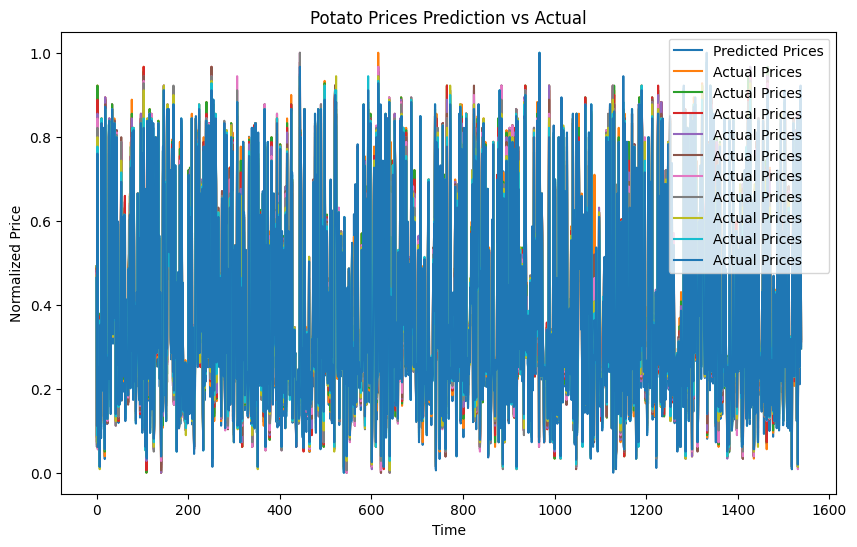

In [20]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted Prices')
plt.plot(y_test, label='Actual Prices')
plt.title('Potato Prices Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [21]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

ValueError: y_true and y_pred have different number of output (10!=1)

In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

In [25]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)


ValueError: y_true and y_pred have different number of output (10!=1)

In [ ]:
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

RMSE: 0.016453755618369433
MAE: 0.010804375284951262
R-squared: 0.9953737603331121


ValueError: x and y must be the same size

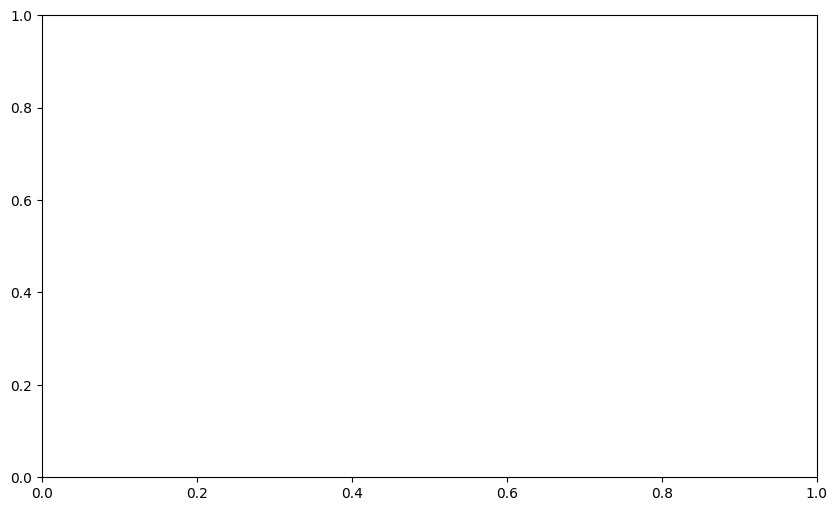

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color="blue", label='Actual Prices', kde=True, stat="density", linewidth=0)
sns.histplot(predictions.ravel(), color="green", label='Predicted Prices', kde=True, stat="density", linewidth=0)
plt.title('Histogram of Actual vs Predicted Prices')
plt.xlabel('Price')
plt.legend()
plt.show()